# <center> Homework 5

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('dataset.csv')
df.head()

In [3]:
y=df.y
X=df.drop(columns='y',axis=1)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.6,stratify=y,random_state=0)

# a)

In [5]:
df2=pd.DataFrame({'x1':X_train.x1,'x2':X_train.x2,'y':y_train})
df2.head()

,x1,x2,y
296,-0.400831,-0.262735,1
175,0.395445,-0.080027,1
354,0.481018,-0.282178,1
396,0.159821,0.093595,0
158,-0.222244,0.251504,0


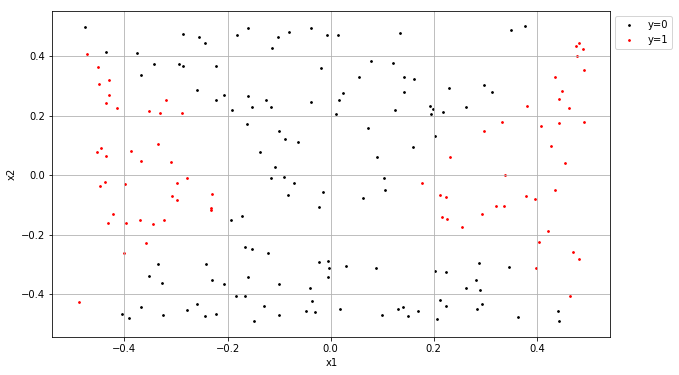

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(df2[df2.y==0].x1,df2[df2.y==0].x2,s=3,c='k')
plt.scatter(df2[df2.y==1].x1,df2[df2.y==1].x2,s=3,c='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['y=0','y=1'],bbox_to_anchor=(1,1))
plt.grid()

# b)

In [7]:
model=LogisticRegression(solver='lbfgs',C=1e20).fit(X_train,y_train)
model.score(X_test,y_test)

0.63

The test accuracy rate is 0.63

# c)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
x2=PolynomialFeatures(degree=2).fit_transform(X)
X2=pd.DataFrame(x2)
X2.columns=['1','x1','x2','x1_2','x1x2','x2_2']
X2.head()

,1,x1,x2,x1_2,x1x2,x2_2
0,1.0,-0.234491,0.054177,0.054986,-0.012704,0.002935
1,1.0,-0.127876,0.188275,0.016352,-0.024076,0.035448
2,1.0,0.072853,0.158058,0.005308,0.011515,0.024982
3,1.0,0.408208,0.163343,0.166634,0.066678,0.026681
4,1.0,-0.298318,-0.027766,0.088994,0.008283,0.000771


# d)

In [9]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y,test_size=0.6,stratify=y,random_state=0)

In [10]:
model2=LogisticRegression(solver='lbfgs',C=1e20).fit(X2_train,y2_train)
model2.score(X2_test,y2_test)

0.99

The test accuracy is 0.99

In [11]:
yhat=model2.predict(X2_test)
pd.crosstab(yhat,y2_test)

y,0,1
row_0,,
0,189,3
1,0,108


# e)

In [12]:
C=10**np.linspace(20,-2,200)
model3=LogisticRegression(solver='lbfgs')
accuracy=[]
for c in C:
    model3.set_params(C=c)
    model3.fit(X2_train,y2_train)
    accuracy.append(model3.score(X2_test,y_test))

In [13]:
a=pd.DataFrame(accuracy,columns=['accuracy'])
a.index=C
a.index.name='C'
a

,accuracy
C,
1.000000e+20,0.990000
7.752597e+19,0.990000
6.010277e+19,0.990000
4.659526e+19,0.990000
3.612343e+19,0.990000
2.800504e+19,0.990000
2.171118e+19,0.990000
1.683180e+19,0.990000
1.304902e+19,0.990000


In [14]:
accuracy.index(max(accuracy))

132

In [15]:
C[132]

255290.80682395166

In [16]:
accuracy[132]

0.9933333333333333

C that yields the largest test accuracy rate is 255290.8068, and the largest test accuracy rate is 0.9933.